#Importing the necessary libraries for our project

Pandas to read the data from CSV file Seaborn for statistical data visualizations Matplotlib for various types of plots.

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [4]:
#Load the Dataset using pd.read_csv

df_reviews = pd.read_csv("Zomato Restaurant reviews.csv")
df_metadata = pd.read_csv("Zomato Restaurant names and Metadata.csv")

#to check the first 5 columns of both the datasets

df_reviews.head()
df_metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
#Displaying basic information
{
    "reviews_columns": df_reviews.columns.tolist(),
    "metadata_columns": df_metadata.columns.tolist(),
    "reviews_nulls": df_reviews.isnull().sum(),
    "metadata_nulls": df_metadata.isnull().sum()
}

{'reviews_columns': ['Restaurant',
  'Reviewer',
  'Review',
  'Rating',
  'Metadata',
  'Time',
  'Pictures'],
 'metadata_columns': ['Name',
  'Links',
  'Cost',
  'Collections',
  'Cuisines',
  'Timings'],
 'reviews_nulls': Restaurant     0
 Reviewer      38
 Review        45
 Rating        38
 Metadata      38
 Time          38
 Pictures       0
 dtype: int64,
 'metadata_nulls': Name            0
 Links           0
 Cost            0
 Collections    54
 Cuisines        0
 Timings         1
 dtype: int64}

In [8]:
#Since we have found null values in both the datasets, we will proceed for data cleaning
#Step1

df_reviews = df_reviews.dropna(subset=['Review'])

In [10]:
#Step 2: Cleaning the cost column metadata dataset (remove commas, convert to numeric)

df_metadata['Cost'] = df_metadata['Cost'].astype(str).str.replace(",", "")
df_metadata['Cost'] = pd.to_numeric(df_metadata['Cost'], errors = 'coerce')

In [12]:
#Rechecking to ensure the above commands worked 

{
    "reviews_columns": df_reviews.columns.tolist(),
    "metadata_columns": df_metadata.columns.tolist(),
    "reviews_nulls": df_reviews.isnull().sum(),
    "metadata_nulls": df_metadata.isnull().sum()
}

{'reviews_columns': ['Restaurant',
  'Reviewer',
  'Review',
  'Rating',
  'Metadata',
  'Time',
  'Pictures'],
 'metadata_columns': ['Name',
  'Links',
  'Cost',
  'Collections',
  'Cuisines',
  'Timings'],
 'reviews_nulls': Restaurant    0
 Reviewer      0
 Review        0
 Rating        0
 Metadata      0
 Time          0
 Pictures      0
 dtype: int64,
 'metadata_nulls': Name            0
 Links           0
 Cost            0
 Collections    54
 Cuisines        0
 Timings         1
 dtype: int64}

In [14]:
#Since we have two different datasets with different details, we will merge both the datasets on a common column name i.e. Restaurant Name
df = pd.merge(df_reviews, df_metadata, left_on = 'Restaurant', right_on = 'Name', how = 'inner')

In [16]:
#Lets check if the data is merged successfully by displaying first 5 columns
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


Now that the Dataset is cleaned and merged, we can start our analysis for drawing insights from it for the business

Simple Sentiment Analysis (Rule-Based)

In [19]:
positive_words = ['good', 'great', 'tasty', 'amazing', 'delicious', 'awesome', 'nice', 'excellent']
negative_words = ['bad', 'worst', 'poor', 'terrible', 'awful', 'slow', 'rude', 'tasteless']

def simple_sentiment(text):
    text = text .lower()
    pos = sum(word in text for word in positive_words)
    neg = sum(word in text for word in negative_words)
    if pos > neg:
        return 'Positive'
    elif neg > pos:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review'].apply(simple_sentiment)

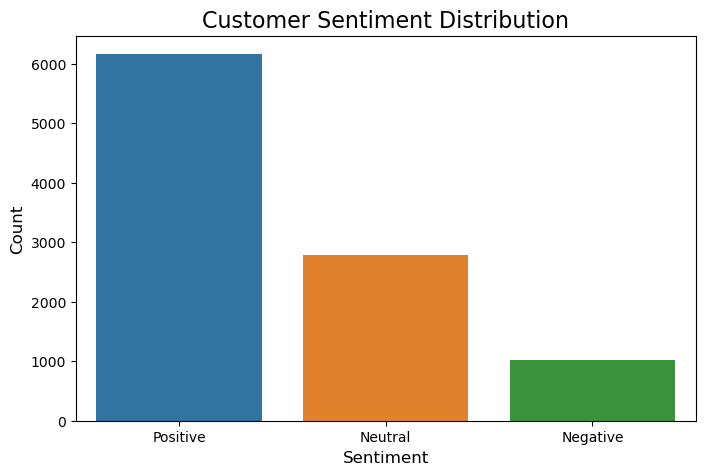

In [21]:
#Since we have defined the necessary words, lets visualize the data for simpler understanding
plt.figure(figsize=(8, 5))  # width, height in inches
sns.countplot(x='Sentiment', data=df)

plt.title("Customer Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [23]:
grouped = df.groupby('Restaurant').agg({'Rating': 'mean', 'Review': 'count', 'Sentiment': lambda x: x.value_counts(normalize = True).to_dict(), 'Cost': 'mean'}).reset_index()

#Extract sentiment ratios
def get_ratio(sent_dict, key):
    return sent_dict.get(key, 0)

grouped['positive_ratio'] = grouped['Sentiment'].apply(lambda x: get_ratio(x, 'Positive'))
grouped['negative_ratio'] = grouped['Sentiment'].apply(lambda x: get_ratio(x, 'Negative'))
grouped['neutral_ratio'] = grouped['Sentiment'].apply(lambda x: get_ratio(x, 'Neutral'))

#Renaming for clarity
grouped.rename(columns = {'Rating': 'avg_rating', 'Review': 'review_count'}, inplace=True)

#Feature set for clustering
features = grouped[['avg_rating', 'review_count', 'Cost', 'positive_ratio', 'negative_ratio']]

TypeError: agg function failed [how->mean,dtype->object]

The above error means that one of the columns has non-numeric data, such as strings or nulls. Lets convert those to numeric and drop the 'na' and then re-run the above code.

In [26]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

In [28]:
df.dropna(subset=['Rating', 'Cost'], inplace=True)

In [30]:
grouped = df.groupby('Restaurant').agg({
    'Rating': 'mean',
    'Review': 'count',
    'Sentiment': lambda x: x.value_counts(normalize=True).to_dict(),
    'Cost': 'mean'
}).reset_index()

# Extract sentiment ratios
def get_ratio(sent_dict, key):
    return sent_dict.get(key, 0)

grouped['positive_ratio'] = grouped['Sentiment'].apply(lambda x: get_ratio(x, 'Positive'))
grouped['negative_ratio'] = grouped['Sentiment'].apply(lambda x: get_ratio(x, 'Negative'))
grouped['neutral_ratio']  = grouped['Sentiment'].apply(lambda x: get_ratio(x, 'Neutral'))

# Rename columns
grouped.rename(columns={'Rating': 'avg_rating', 'Review': 'review_count'}, inplace=True)

# Final feature set
features = grouped[['avg_rating', 'review_count', 'Cost', 'positive_ratio', 'negative_ratio']]

In [32]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['Cluster'] = kmeans.fit_predict(X_scaled)

C:\ProgramData\shail\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\shail\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


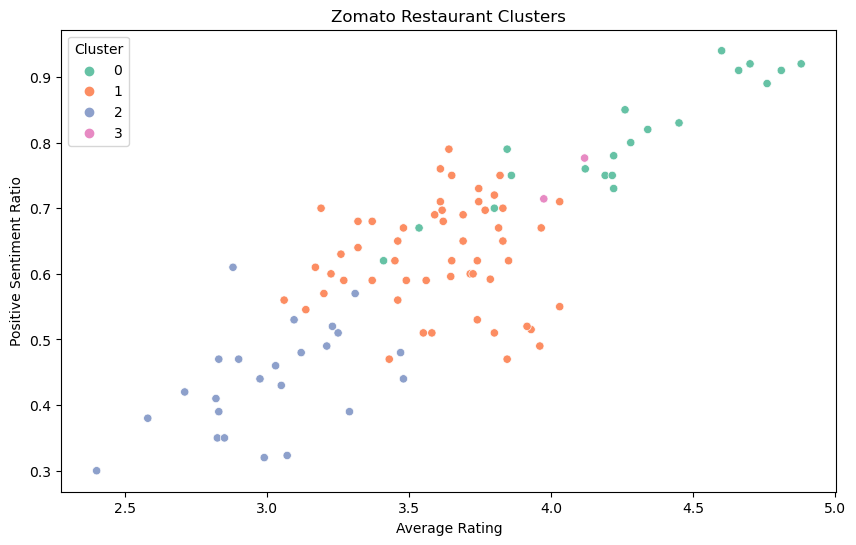

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=grouped, x='avg_rating', y='positive_ratio', hue='Cluster', palette='Set2')
plt.title("Zomato Restaurant Clusters")
plt.xlabel("Average Rating")
plt.ylabel("Positive Sentiment Ratio")
plt.show()

In [36]:
# Step 1: Check cluster-wise performance
cluster_summary = grouped.groupby('Cluster').agg({
    'avg_rating': 'mean',
    'positive_ratio': 'mean',
    'review_count': 'mean',
    'Cost': 'mean'
}).reset_index().sort_values(by=['avg_rating', 'positive_ratio'], ascending=False)

print(cluster_summary)

   Cluster  avg_rating  positive_ratio  review_count     Cost
0        0    4.257750        0.804500    100.000000  1557.50
3        3    4.045837        0.745378     81.000000  1100.00
1        1    3.606420        0.626340     99.870370   750.00
2        2    3.008154        0.438885     99.958333   556.25


In [42]:
# Step 2: Identify best-performing cluster
best_cluster = int(cluster_summary.iloc[0]['Cluster'])
best_cluster

0

In [40]:
# Step 3: Extract top restaurants from that cluster
top_restaurants = grouped[grouped['Cluster'] == best_cluster].sort_values(
    by=['avg_rating', 'positive_ratio', 'review_count'], ascending=False
).head(10)
print(top_restaurants[['Restaurant', 'avg_rating', 'positive_ratio', 'review_count', 'Cost']])

                                 Restaurant  avg_rating  positive_ratio  \
3                 AB's - Absolute Barbecues        4.88            0.92   
11                                   B-Dubs        4.81            0.91   
2            3B's - Buddies, Bar & Barbecue        4.76            0.89   
67                                 Paradise        4.70            0.92   
35                                 Flechazo        4.66            0.91   
87                           The Indi Grill        4.60            0.94   
97          Zega - Sheraton Hyderabad Hotel        4.45            0.83   
64               Over The Moon Brew Company        4.34            0.82   
16                          Beyond Flavours        4.28            0.80   
19  Cascade - Radisson Hyderabad Hitec City        4.26            0.85   

    review_count    Cost  
3            100  1500.0  
11           100  1600.0  
2            100  1100.0  
67           100   800.0  
35           100  1300.0  
87          

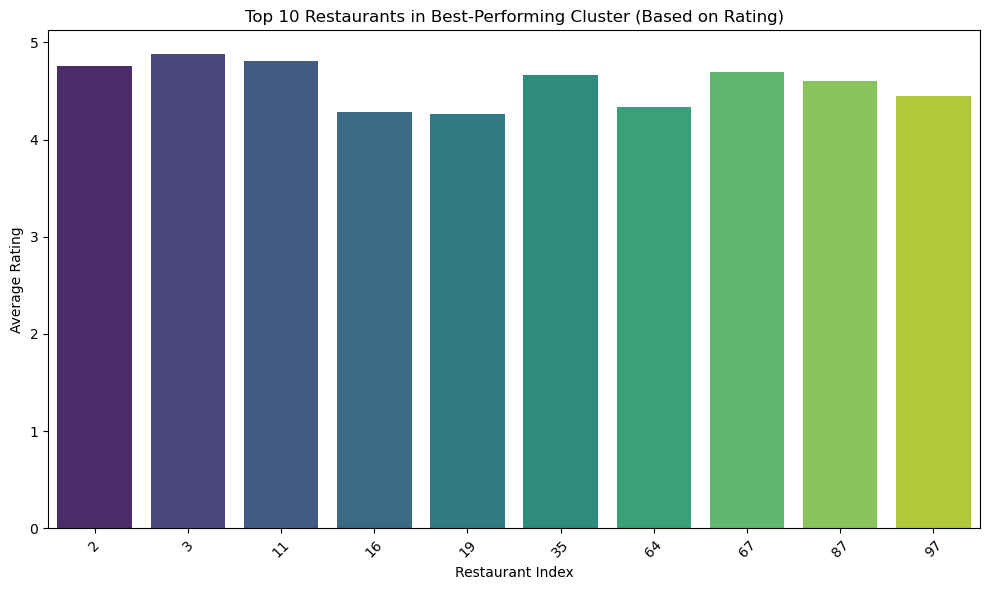

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_restaurants, x=top_restaurants.index, y='avg_rating', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Restaurants in Best-Performing Cluster (Based on Rating)")
plt.ylabel("Average Rating")
plt.xlabel("Restaurant Index")
plt.tight_layout()
plt.show()

In [46]:
# Merge to get full details
top_restaurant_names = top_restaurants['Restaurant'].unique()
top_restaurant_details = df[df['Restaurant'].isin(top_restaurant_names)]

# Optional: Select important columns
final_output = top_restaurant_details[['Restaurant', 'Cuisines', 'Cost', 'Collections', 'Sentiment', 'Review', 'Rating']]
final_output.head(10)

,Restaurant,Cuisines,Cost,Collections,Sentiment,Review,Rating
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,"The ambience was good, food was quite good . h...",5.0
1,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,Ambience is too good for a pleasant evening. S...,5.0
2,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,A must try.. great food great ambience. Thnx f...,5.0
3,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,Soumen das and Arun was a great guy. Only beca...,5.0
4,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,Food is good.we ordered Kodi drumsticks and ba...,5.0
5,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,"Ambiance is good, service is good, food is aPr...",5.0
6,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,"Its a very nice place, ambience is different, ...",5.0
7,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,Well after reading so many reviews finally vis...,4.0
8,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,"Excellent food , specially if you like spicy f...",5.0
9,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Positive,Came for the birthday treat of a close friend....,5.0


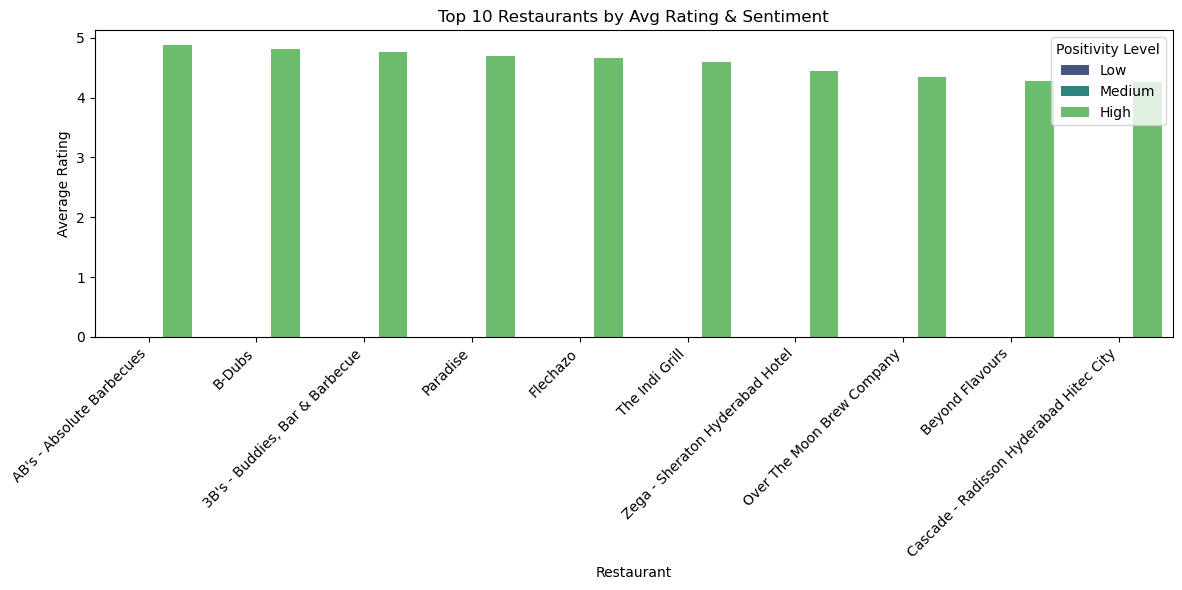

In [48]:
# Bin the positive_ratio into 3 categories for hue
top_restaurants['Positivity Level'] = pd.cut(
    top_restaurants['positive_ratio'],
    bins=[0, 0.5, 0.75, 1],
    labels=['Low', 'Medium', 'High']
)

# Now plot with hue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_restaurants,
    x='Restaurant',
    y='avg_rating',
    hue='Positivity Level',
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Restaurants by Avg Rating & Sentiment")
plt.ylabel("Average Rating")
plt.xlabel("Restaurant")
plt.tight_layout()
plt.show()

In [50]:
#Adding a summary table for better understanding
summary_table = top_restaurants[['Restaurant', 'avg_rating', 'positive_ratio', 'review_count', 'Cost']]
summary_table.columns = ['Restaurant', 'Avg Rating', 'Positive Ratio', 'Review Count', 'Cost']
summary_table.reset_index(drop=True, inplace=True)
summary_table

,Restaurant,Avg Rating,Positive Ratio,Review Count,Cost
0,AB's - Absolute Barbecues,4.88,0.92,100,1500.0
1,B-Dubs,4.81,0.91,100,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,0.89,100,1100.0
3,Paradise,4.70,0.92,100,800.0
4,Flechazo,4.66,0.91,100,1300.0
5,The Indi Grill,4.60,0.94,100,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,0.83,100,1750.0
7,Over The Moon Brew Company,4.34,0.82,100,1200.0
8,Beyond Flavours,4.28,0.80,100,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,0.85,100,1800.0


✅ Business Recommendations
1. 
Focus marketing efforts on restaurants in Cluster {best_cluster} as they have high customer satisfactio
2. Promote restaurants with high positive sentiment and high average ratings, such as {top_restaurants.iloc[0]['Restaurant']}.
3. Consider reaching out to restaurants in lower-performing clusters for improvement strategies.ies.

In [62]:
# If the cluster summary is in float format we need to change it to integer
print(cluster_summary)
print("Columns:", cluster_summary.columns)

   Cluster  avg_rating  positive_ratio  review_count     Cost
0        0    4.257750        0.804500    100.000000  1557.50
3        3    4.045837        0.745378     81.000000  1100.00
1        1    3.606420        0.626340     99.870370   750.00
2        2    3.008154        0.438885     99.958333   556.25
Columns: Index(['Cluster', 'avg_rating', 'positive_ratio', 'review_count', 'Cost'], dtype='object')


In [64]:
grouped['Cluster'] = pd.to_numeric(grouped['Cluster'], errors='coerce')
grouped = grouped.dropna(subset=['Cluster'])
grouped['Cluster'] = grouped['Cluster'].astype(int)

In [66]:
# Extract cluster numbers from sorted cluster_summary
cluster_order = cluster_summary.sort_values(by='avg_rating', ascending=False)['Cluster'].tolist()

# Convert to int
cluster_order = [int(c) for c in cluster_order]

# Assign clusters
best_cluster = cluster_order[0]
medium_cluster = cluster_order[1]
low_cluster = cluster_order[2]

print("Best:", best_cluster, "Medium:", medium_cluster, "Low:", low_cluster)

Best: 0 Medium: 3 Low: 1


In [68]:
def get_top_restaurants(df, cluster_id, top_n=5):
    return (
        df[df['Cluster'] == cluster_id]
        .sort_values(by=['avg_rating', 'Sentiment'], ascending=False)
        [['Restaurant', 'avg_rating', 'Sentiment', 'review_count', 'Cost']]
        .head(top_n)
    )

In [70]:
top_best = get_top_restaurants(grouped, best_cluster)
top_medium = get_top_restaurants(grouped, medium_cluster)
top_low = get_top_restaurants(grouped, low_cluster)

print("🔵 Top Best Cluster Restaurants:\n", top_best)
print("\n🟡 Top Medium Cluster Restaurants:\n", top_medium)
print("\n🔴 Top Low Cluster Restaurants:\n", top_low)

TypeError: unhashable type: 'dict'

In [72]:
def get_top_restaurants(df, cluster_id, top_n=5):
    print(f"\n🔎 DEBUG: Type of cluster_id = {type(cluster_id)} | Value = {cluster_id}")
    
    # Check if it's a dictionary by mistake
    if isinstance(cluster_id, dict):
        raise ValueError("❌ ERROR: `cluster_id` is a dict! Should be an int.")
    
    return (
        df[df['Cluster'] == cluster_id]
        .sort_values(by=['avg_rating', 'Sentiment'], ascending=False)
        [['Restaurant', 'avg_rating', 'Sentiment', 'review_count', 'Cost']]
        .head(top_n)
    )

In [74]:
top_best = get_top_restaurants(grouped, best_cluster)
top_medium = get_top_restaurants(grouped, medium_cluster)
top_low = get_top_restaurants(grouped, low_cluster)


🔎 DEBUG: Type of cluster_id = <class 'int'> | Value = 0


TypeError: unhashable type: 'dict'

In [82]:
best_cluster = int(cluster_summary.sort_values(by='avg_rating', ascending=False).iloc[0]['Cluster'])
medium_cluster = int(cluster_summary.sort_values(by='avg_rating', ascending=False).iloc[1]['Cluster'])
low_cluster = int(cluster_summary.sort_values(by='avg_rating', ascending=False).iloc[2]['Cluster'])
print('The best cluster is:', best_cluster)
print('The medium level cluster is:', medium_cluster)
print('The low level cluster is:', low_cluster)

The best cluster is: 0
The medium level cluster is: 3
The low level cluster is: 1


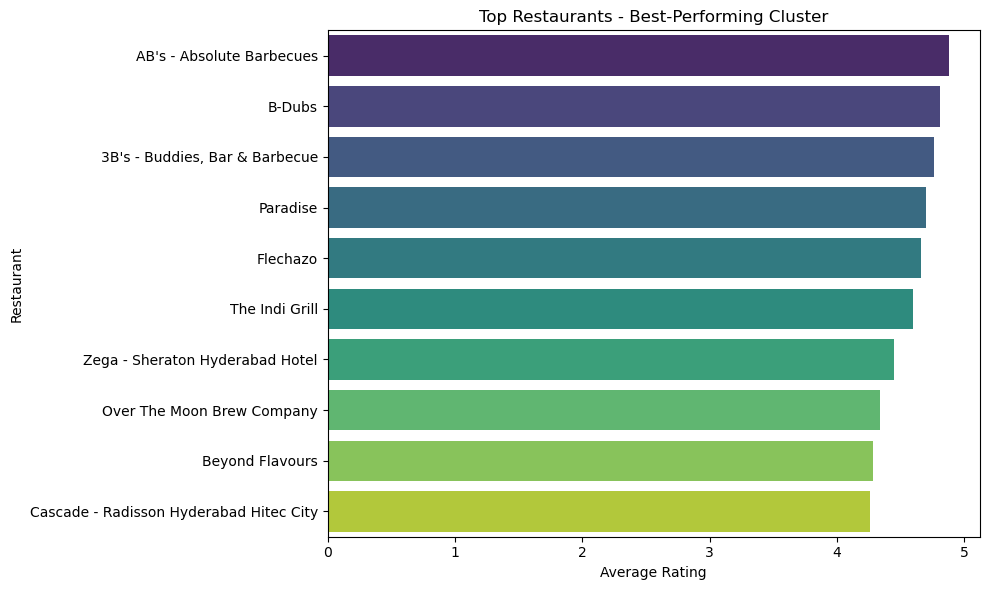

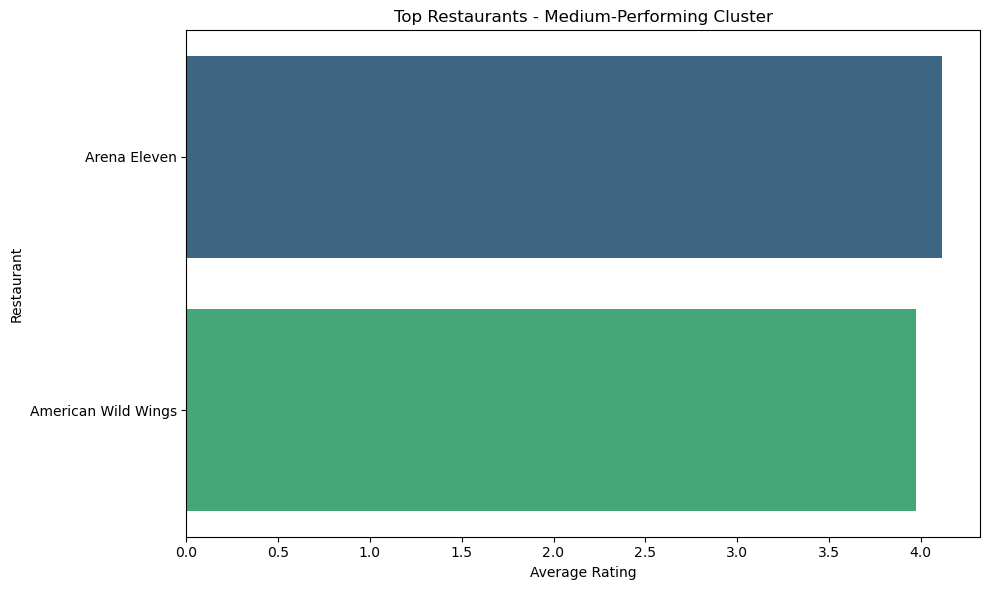

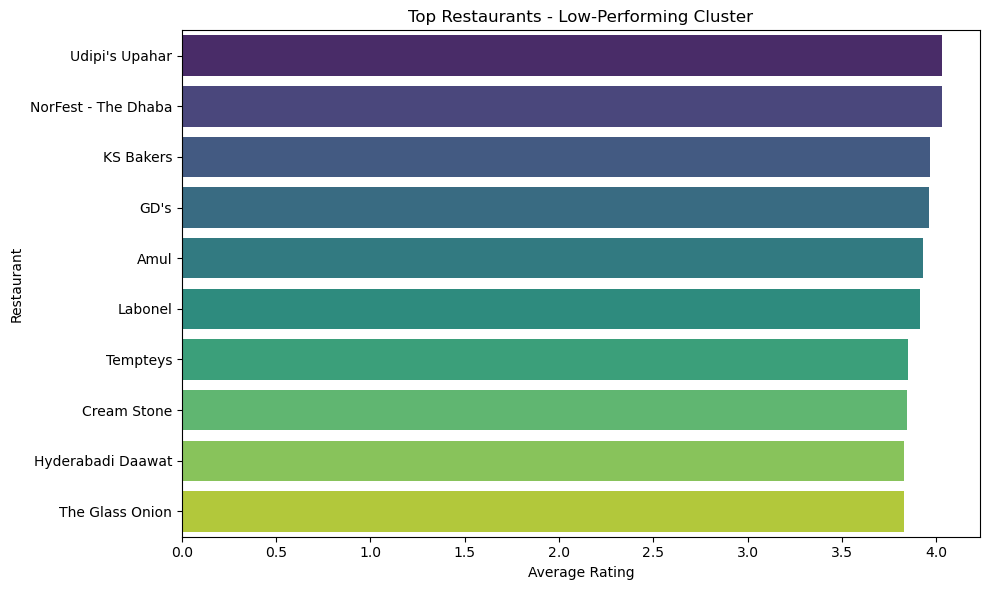

In [84]:
# Function to plot top restaurants from a cluster
def plot_top_restaurants(df, cluster_label, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df[df['Cluster'] == cluster_label].sort_values('avg_rating', ascending=False).head(10),
        x='avg_rating',
        y='Restaurant',
        palette='viridis'
    )
    plt.title(f"Top Restaurants - {title} Cluster")
    plt.xlabel("Average Rating")
    plt.ylabel("Restaurant")
    plt.tight_layout()
    plt.show()

best_cluster = int(best_cluster)
medium_cluster = int(medium_cluster)
low_cluster = int(low_cluster)

# Plot for each cluster
plot_top_restaurants(grouped, best_cluster, "Best-Performing")
plot_top_restaurants(grouped, medium_cluster, "Medium-Performing")
plot_top_restaurants(grouped, low_cluster, "Low-Performing")

What we did:
Seperated restaurants into three performance-based clusters:
1. Best performing
2. Medium performing
3. Low performing

In [99]:
cluster_insights = grouped.groupby('Cluster').agg({
    'avg_rating': 'mean',
    'review_count': 'mean',
    'Sentiment': lambda x: x.value_counts().idxmax()  # Most common sentiment in cluster
}).reset_index()

# Round the values for readability
cluster_insights['avg_rating'] = cluster_insights['avg_rating'].round(2)
cluster_insights['review_count'] = cluster_insights['review_count'].round(0)

cluster_insights.columns = ['Cluster', 'Avg Rating', 'Avg Review Count', 'Dominant Sentiment']
cluster_insights

,Cluster,Avg Rating,Avg Review Count,Dominant Sentiment
0,0,4.26,100.0,"{'Positive': 0.75, 'Neutral': 0.2, 'Negative':..."
1,1,3.61,100.0,"{'Positive': 0.59, 'Neutral': 0.3, 'Negative':..."
2,2,3.01,100.0,"{'Positive': 0.44, 'Neutral': 0.42, 'Negative'..."
3,3,4.05,81.0,"{'Positive': 0.7142857142857143, 'Neutral': 0...."


In [101]:
# Show full width of all columns in Jupyter output
pd.set_option('display.max_colwidth', None)
display(cluster_insights)

,Cluster,Avg Rating,Avg Review Count,Dominant Sentiment
0,0,4.26,100.0,"{'Positive': 0.75, 'Neutral': 0.2, 'Negative': 0.05}"
1,1,3.61,100.0,"{'Positive': 0.59, 'Neutral': 0.3, 'Negative': 0.11}"
2,2,3.01,100.0,"{'Positive': 0.44, 'Neutral': 0.42, 'Negative': 0.14}"
3,3,4.05,81.0,"{'Positive': 0.7142857142857143, 'Neutral': 0.2077922077922078, 'Negative': 0.07792207792207792}"


In [109]:
grouped.columns.tolist()

['Restaurant',
 'avg_rating',
 'review_count',
 'Sentiment',
 'Cost',
 'positive_ratio',
 'negative_ratio',
 'neutral_ratio',
 'Cluster']

In [119]:
best_cluster = int(cluster_summary.iloc[0]['Cluster'])
# Filter only the rows from the best-performing cluster
best_cluster_data = grouped[grouped['Cluster'] == best_cluster]
# Summary statistics
summary_best_cluster = {
    "Number of Restaurants": best_cluster_data.shape[0],
    "Average Rating": best_cluster_data['avg_rating'].mean(),
    "Average Cost for Two": best_cluster_data['Cost'].mean(),
    "Average Positive Sentiment Ratio": best_cluster_data['positive_ratio'].mean(),
    "Average Negative Sentiment Ratio": best_cluster_data['negative_ratio'].mean(),
    "Average Neutral Sentiment Ratio": best_cluster_data['neutral_ratio'].mean()
}

# Display the summary
print('Best Cluster:', best_cluster)
for k, v in summary_best_cluster.items():
    print(f"{k}: {v:.2f}")

Best Cluster: 0
Number of Restaurants: 20.00
Average Rating: 4.26
Average Cost for Two: 1557.50
Average Positive Sentiment Ratio: 0.80
Average Negative Sentiment Ratio: 0.05
Average Neutral Sentiment Ratio: 0.15


Hierarchical Clustering

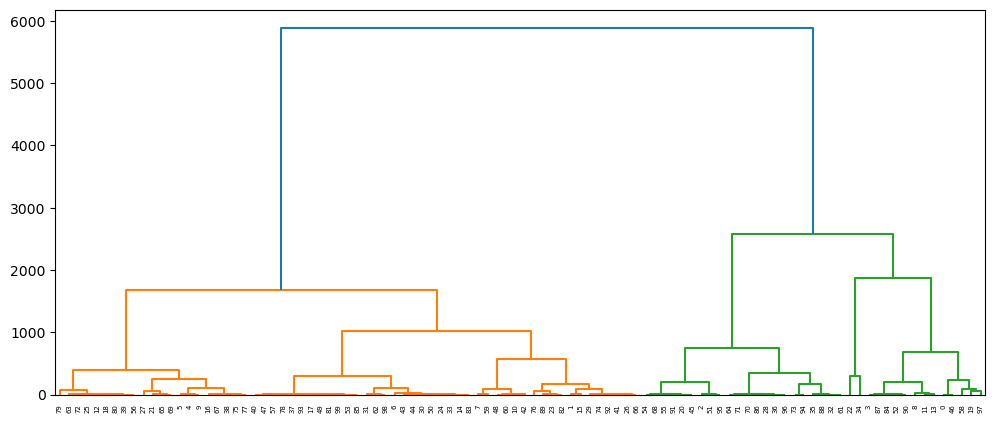

In [123]:
# Sample data
X = grouped[['avg_rating', 'review_count', 'Cost', 'positive_ratio', 'negative_ratio', 'neutral_ratio']]

# Hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(Z)
plt.show()

# Assign clusters
grouped['Cluster_HC'] = fcluster(Z, t=3, criterion='maxclust')

In [126]:
#grouping by the cluster labels
grouped.groupby('Cluster').mean(numeric_only=True)[['avg_rating', 'Cost', 'review_count', 
                                                     'positive_ratio', 'negative_ratio', 'neutral_ratio']]

,avg_rating,Cost,review_count,positive_ratio,negative_ratio,neutral_ratio
Cluster,,,,,,
0,4.257750,1557.50,100.000000,0.804500,0.046500,0.149000
1,3.606420,750.00,99.870370,0.626340,0.090294,0.283366
2,3.008154,556.25,99.958333,0.438885,0.175067,0.386048
3,4.045837,1100.00,81.000000,0.745378,0.080138,0.174484


In [130]:
# Assuming df_scaled is your normalized feature set
linked = linkage(grouped, method='ward')

plt.figure(figsize=(16, 7))
dendrogram(linked, labels=grouped['Restaurant'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Restaurants)')
plt.xlabel('Restaurants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '10 Downing Street'

In [132]:
# Select only numeric columns for clustering
features = grouped[['avg_rating', 'Cost', 'review_count', 
                    'positive_ratio', 'negative_ratio', 'neutral_ratio']]

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

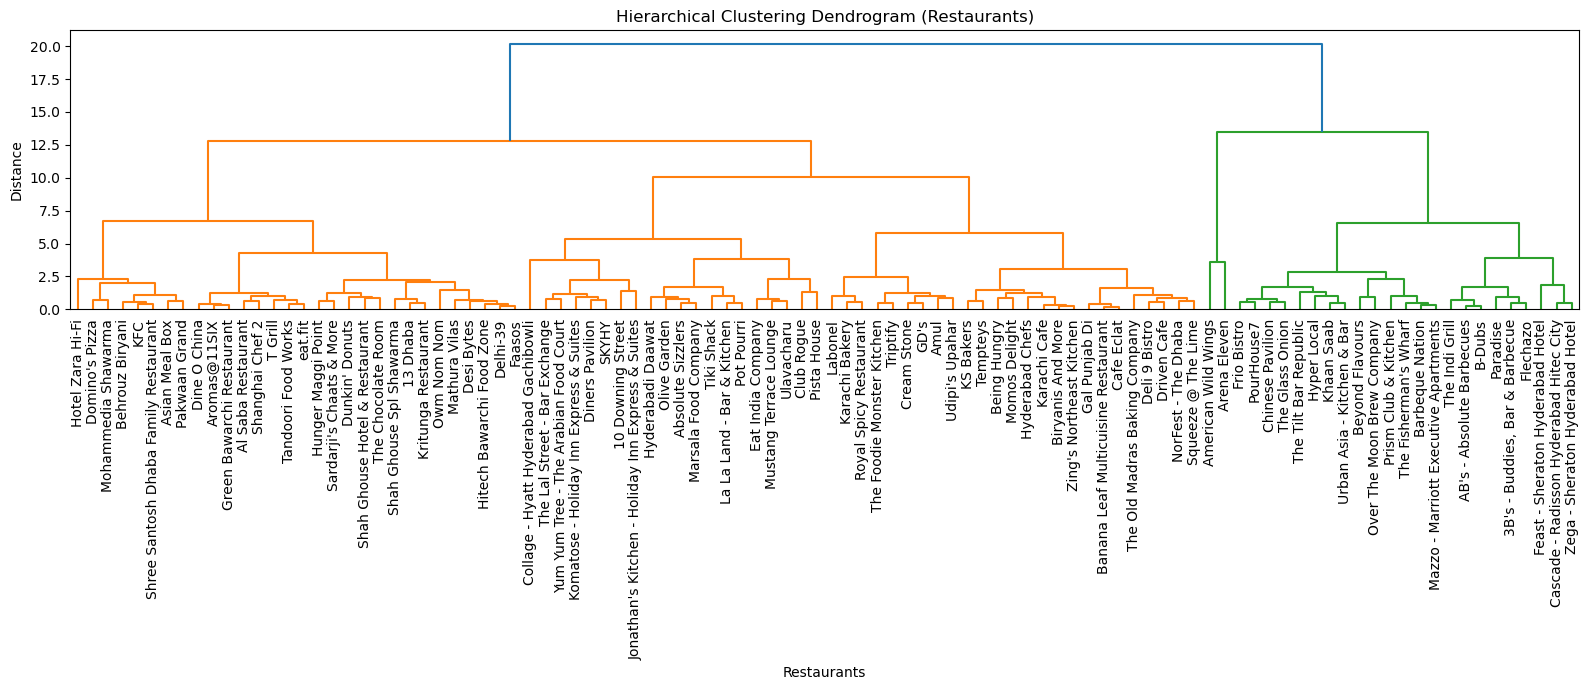

In [134]:
# Assuming df_scaled is your normalized feature set
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(16, 7))
dendrogram(linked, labels=grouped['Restaurant'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Restaurants)')
plt.xlabel('Restaurants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [140]:
#Trying to store the kmeans cluster labels in grouped Dataframe
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

grouped['KMeans_Cluster'] = kmeans.labels_

C:\ProgramData\shail\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\shail\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [142]:
#Quick verification if the above code worked

grouped['KMeans_Cluster'].value_counts()

KMeans_Cluster
1    54
0    44
2     2
Name: count, dtype: int64

In [144]:
# Create a crosstab
pd.crosstab(grouped['Cluster'], grouped['KMeans_Cluster'])

KMeans_Cluster,0,1,2
Cluster,,,
0,20,0,0
1,24,30,0
2,0,24,0
3,0,0,2


#Here's how you read the above table
Each row = a hierarchical cluster from the dendrogram
Each column = a KMeans cluster
Each cell = number of restaurants shared between both clusters

Interpretation:
1. Cluster 0 (Hierarchical):
   - All 20 restaurants here are also in Kmeans cluster 0 -> Strong agreement
2. Cluster 1 (Hierarchical):
   - Split between KMeans cluster 0 (24) and KMeans Cluster 1 (30) -> Partial Mismatch
3. Cluster 2 (Hierarchical):
   - All 24 match KMeans cluster 1 -> Good Match
4. Cluster 3 (Hierarchical):
   -All 2 match in KMeans Cluster 2 -> Good Match

Insights:
1. Both algorithms have strong overlaps, especially for Cluster 0, 2 and 3
2. Cluster 1 (Hierarchical) contains some ambiguity - KMeans split this into two groups
3. That means KMeans found some substructure within the hierarchical thought was a single group